# Emotion classification using deep learning and EEG signals

### Cross-wavelet spectrum images are used as dataset for emotion classification using 
### SEED-1 dataset of EEG signals.

## Method - 1
Cross-wavelet spectrum of the original signal and it’s denoised version. A total of 12741 images were generated out of 13950 images.
 After 80-20 split, the dataset consisted of -
•	Training set – 10192 images
•	Test set – 2549 images

In [ ]:
import numpy as np
import cv2 as cv
import pandas as pandas
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = ["0","1","2"]
X=[]
Y=[]

for i in file:
    for (root,dirs,file) in os.walk('/content/drive/MyDrive/Seed 1 spectogram/Method_1/'+i):
        for f in file:
            path = ('/content/drive/MyDrive/Seed 1 spectogram/Method_1/'+i+'/'+f)
            print(path)
            #print(path)
            img1 = cv.imread(path)
            img1 = img1[45:590,100:716] #crop images to remove labels
            img1 = cv.resize(img1,(224,224))#resize images to 224x224 pixels
            X.append(img1)
            Y.append(int(i))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/mf40.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/mf34.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/bg44.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/bg32.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/bg41.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/bg9.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/bg11.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/kf59.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/bg5.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/bg27.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/mf18.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/bg15.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/mf13.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/bg23.jpg
/content/drive/MyDrive/Seed 1 spectogram/Method_1/1/bg16.jpg
/content/drive/MyDrive/Seed 1 specto

In [ ]:
X[0][200][200]

array([196, 225, 157], dtype=uint8)

In [ ]:
X

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 45,  39,  40],
         [ 67,  33,  39],
         [ 84,  32,  40],
         ...,
         [ 17,  16,  16],
         [255, 255, 255],
         [255, 254, 255]],
 
        [[ 32,  35,  34],
         [ 94,  29,  38],
         [149,  43,  61],
         ...,
         [ 30,  15,  18],
         [250, 252, 252],
         [251, 255, 255]],
 
        ...,
 
        [[144, 144, 141],
         [ 31,  25,  13],
         [ 37,  28,   9],
         ...,
         [  8,   9,   8],
         [255, 255, 255],
         [255, 253, 255]],
 
        [[248, 251, 255],
         [252, 255, 254],
         [255, 255, 252],
         ...,
         [255, 253, 255],
         [254, 253, 255],
         [255, 254, 255]],
 
        [[247, 251, 252],
         [253, 255, 254],
         [254, 255, 253],
         ...,
         [254, 254, 253],
  

In [ ]:
len(X)

12741

In [ ]:
X =np.asarray(X).reshape(len(X),224,224,3)
X.shape    # images

(12741, 224, 224, 3)

In [ ]:
len(Y)

12741

In [ ]:
Y = np.asarray(Y)
Y.shape   #labels


#image = np.asarray(image).reshape(372,875,6565,3)

(12741,)

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
len(Y)

12741

In [ ]:
Y

array([0, 0, 0, ..., 2, 2, 2])

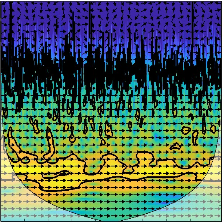

In [ ]:
cv2_imshow(X[0])

In [ ]:
from sklearn.model_selection import train_test_split
#import tensorflow as tf
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
import keras,tensorflow
from keras.applications.vgg19 import VGG19

img_height = 224   # 875 x 656
img_width = 224
img_channels = 3
num_classes = 3
#learning_rate = 1e-5


def build_model():
    base = VGG19(include_top = False, weights = 'imagenet', input_shape = (img_height, img_width, img_channels))
    X = base.output
    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(512, activation = 'relu')(X)
    X = keras.layers.Dropout(0.4)(X)
    X = keras.layers.BatchNormalization()(X)
    X = keras.layers.Dense(512, activation = 'relu')(X)
    X = keras.layers.Dropout(0.3)(X)
    X = keras.layers.BatchNormalization()(X)
    preds = keras.layers.Dense(num_classes, activation = 'softmax')(X)
    
    model = keras.models.Model(inputs = base.input, outputs = preds)
    model.compile(optimizer = 'adam', loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
    
    return model
model = build_model()
model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
history =model.fit(X_train,Y_train, epochs=20,validation_data=(X_test,Y_test))


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


319/319 [==============================] - 195s 549ms/step - loss: 1.3449 - accuracy: 0.3566 - val_loss: 462153.7188 - val_accuracy: 0.3582
Epoch 2/20
319/319 [==============================] - 172s 538ms/step - loss: 1.1441 - accuracy: 0.3914 - val_loss: 28067702.0000 - val_accuracy: 0.3656
Epoch 3/20
319/319 [==============================] - 171s 537ms/step - loss: 0.9435 - accuracy: 0.5171 - val_loss: 1.7911 - val_accuracy: 0.5869
Epoch 4/20
319/319 [==============================] - 171s 537ms/step - loss: 0.6594 - accuracy: 0.6630 - val_loss: 0.6023 - val_accuracy: 0.6630
Epoch 5/20
319/319 [==============================] - 171s 536ms/step - loss: 0.6158 - accuracy: 0.6795 - val_loss: 0.6697 - val_accuracy: 0.6673
Epoch 6/20
319/319 [==============================] - 171s 535ms/step - loss: 0.5993 - accuracy: 0.6942 - val_loss: 22.0969 - val_accuracy: 0.5167
Epoch 7/20
319/319 [==============================] - 171s 535ms/step - loss: 0.4674 - accuracy: 0.7609 - val_loss: 0.6141

In [ ]:
history

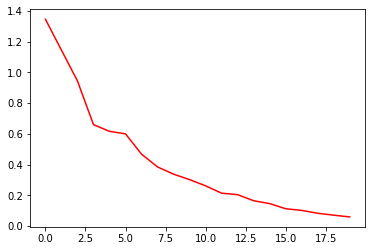

In [ ]:
plt.plot(history.history['loss'],color='red')
# plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

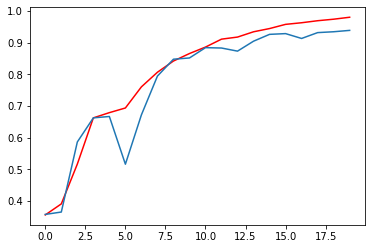

In [ ]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
Y_test

array([2, 2, 0, ..., 0, 1, 1])

In [ ]:
y_pred = model.predict(X_test)


In [ ]:

y_pred= [np.argmax(y_pred[i]) for i in range(len(y_pred))]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(Y_test,y_pred))

In [ ]:
len(Y_test)

In [ ]:
len(Y_train)

10192

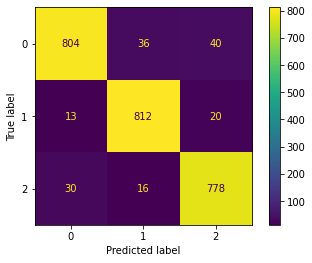

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
plot= ConfusionMatrixDisplay(cm)
plot.plot()
plt.show()

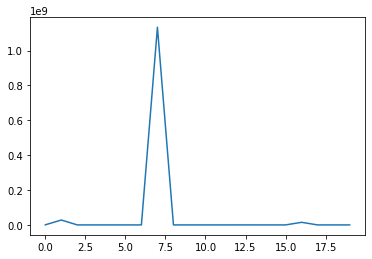

In [ ]:
plt.plot(history.history['val_loss'])
plt.show()